In [7]:
#8.20 a)
'''
S'(t) viser hvor mange som kan bli smittet i dag t.  
R'(t) viser hvor mange som har er kurert i dag t. 
Vi løser disse likningene for å kunne se på grafen hvor mange som kan bli smittet og kurert i et gitt dag. 
'''

In [ ]:
#8.20 b)
'''
Hvis vi sier at ingen dør i denne situasjonen og at alle S kan bli smittet --> 
Alle som blir smittet i S, går over til I, altså de er smitte og kan smitte andre.
Men uten død, vil alle smitta bli friske igjen og da skaper de imunforsvar mot viruset.
Da kan de ikke bli i S igjen. Alle de plussa blir da til 0

S'(t) + I'(t) + R'(t) = 0
S'(t) = -b*S(t)I(t)
R'(t) = f*I(t)
Hvis vi lar I'(t) være alene på venstre siden og flytter S'(t) og R'(t) til høyre side av likhetstegnet
Da blir likningen slik:
I'(t) = -S'(t) - R'(t)
Som blir da:
    I'(t) = b*s(t)I(t) -f*I(t)
S'(t) og R'(t) blir her det motsatte siden de er - nå. 
'''

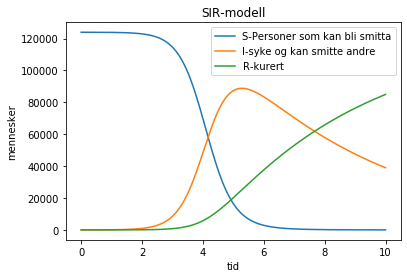

In [17]:
#8.20 c)
import numpy as np
import matplotlib.pyplot as plt

N = 124000
b = 2*10**-5
f = 0.2
S0 = N - 10 
I0 = 10
R0 = 0
tid = 10
dt = tid/(N-1)

#matriser
t = np.zeros(N)
S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)
Sder = np.zeros(N)
Ider = np.zeros(N)
Rder = np.zeros(N)

#initierer matrisene
S[0] = S0
R[0] = R0
I[0] = I0

#Eulers metode
for i in range(N-1):
    Sder[i] = -b*S[i] * I[i]
    Ider[i] = b*S[i] * I[i] - f*I[i]
    Rder[i] = f*I[i]
    S[i+1] = S[i]+Sder[i]*dt
    I[i+1] = I[i]+Ider[i]*dt
    R[i+1] = R[i]+Rder[i]*dt
    t[i+1] = t[i]+dt


plt.plot(t,S,label='S-Personer som kan bli smitta')
plt.plot(t,I,label='I-syke og kan smitte andre')
plt.plot(t,R,label='R-kurert')
plt.xlabel('tid')
plt.ylabel('mennesker')
plt.title('SIR-modell')
plt.legend()
plt.show()

#Programmet viser at det blir ca. over 80000 smittede dag ca.6.

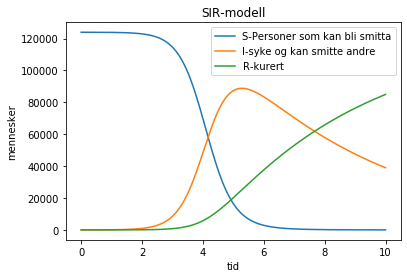

In [4]:
#8.20 d)
import numpy as np
import matplotlib.pyplot as plt

N = 124000
tid = 10
dt = tid/(N-1)


#Eulers metode
def SIR(f,b,S0,I0,R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

    #initierer matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0
    for i in range(N-1):
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]
        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt

    return t,S,I,R


#kaller SIR funksjoner
t,S,I,R = SIR(0.2,2*10**-5,N - 10,10,0) 


plt.plot(t,S,label='S-Personer som kan bli smitta')
plt.plot(t,I,label='I-syke og kan smitte andre')
plt.plot(t,R,label='R-kurert')
plt.xlabel('tid')
plt.ylabel('mennesker')
plt.title('SIR-modell')
plt.legend()
plt.show()

#Her er grafen og hele oppgaven det samme som i c), men Eulers metode er nå i en funksjon. 

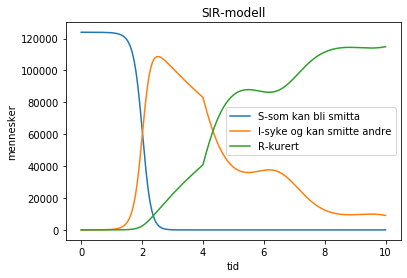

In [5]:
#8.20 e)
import numpy as np
import matplotlib.pyplot as plt
import math

N = 124000
tid = 10
dt = tid/(N-1)


#Eulers metode
def SIR(S0,I0,R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

    #initierer matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0
    for i in range(N-1):
        b = 2*10**-5*(t[i]+1)*math.exp(-0.01*t[i]**2)
        if t[i]<4:
            f = 0.2
        else:
            f = 0.4+0.5*math.sin(0.6*math.pi*t[i])
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]
        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt

    return t,S,I,R


#kaller SIR funksjoner
t,S,I,R = SIR(N - 10,10,0) 


plt.plot(t,S,label='S-som kan bli smitta')
plt.plot(t,I,label='I-syke og kan smitte andre')
plt.plot(t,R,label='R-kurert')
plt.xlabel('tid')
plt.ylabel('mennesker')
plt.title('SIR-modell')
plt.legend()
plt.show()
#Her gjorde vi en variasjon i parametrene. Her ser vi variasjon etter dag 4, R og I skal ha litt bølge formet linje. 
#f varierer fra sinus, mens b varierer fra eulers tall(logaritme).

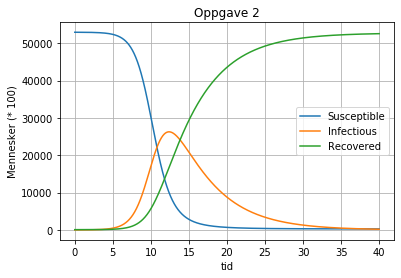

In [74]:
#2.
import numpy as np
import matplotlib.pyplot as plt
import os
import math

#Lese fra fil(N,tid,b,f,S0,I0,R0)
#og returnerer listen av parametre over i float
#Input parameter er linjes nummer fra config fil. 
def initialValues(linjeTall):
   
    f = open("initsir.dat", "r") #åpner filen
    line = f.readline() #leser første linjen
    ln = 1
    #Finner og leser linjeTall
    while line:
        if(ln == linjeTall):
            break
        else:
            line = f.readline()
            ln += 1
    f.close()
    params = line.split('#')[0] #Leser alt før #

    res = params.split(",") #Konverterer string (params) til liste res 

    # Konverterer liste elementer til float
    newlist = [] #tom liste
    #Går gjennom hele lista og konverterer elementer til float  
    for i in range(0, len(res)):
        newlist.append(float(res[i]))

    return newlist

#Funksjon for regning av SIR modell
def SIR(b,f,S0, I0, R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

#initialisering av matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0

#Eulers metode
    for i in range(N-1):
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]

        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt
    return t,S,I,R

def plot(title):
    # Plotter diagramet
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infectious')
    plt.plot(t,R,label='Recovered')
    plt.title(title)
    plt.xlabel('tid')
    plt.ylabel('Mennesker (* 100)')
    plt.legend()
    plt.grid()
    plt.show()

#Hoved

#Oppgave 2
#Definere konstanter 
iv = initialValues(2) #Config parameter fra linje 2
N = int(iv[0]) #Antall mennesker
tid = int(iv[1]) #dager
dt = tid/(N-1)

t,S,I,R = SIR(iv[2], iv[3],iv[4],iv[5],iv[6])
plot('Oppgave 2')


#Vi brukte at Norge har 5.300.000 borgere. Smittede i Norge er nå 8197, med 92% av de friske. 
#For å få et finere graf, minket vi alle tall 100 ganger. 
#Det betyr at: N=53000, S0=N-I0-R0, I0=6.55, R0=75.41. 
#Vi brukte tallet b og f fra oppgave 8.20 i boka som betyr at b = 0.00005 og f = 0.2(20%).
#Vi brukte også tid = 40 dager for å vise alt som kan skje i situasjonen. 
#Vi ser fra grafen at antall smittede skal være ca. 2,6 milioner mennesker 12.dag fra starten av utbuddet.
#På dag 40 er det lenger ikke noen smitted og hele befolkningen har skapt imunforsvar mot viruset. 




In [ ]:

# N, tid, b, f, S0, I0, R0 
53000, 40, 0.00002, 0.2, 52918, 6.55, 75.41 # Oppgave 2
53000, 40, 0.0000085, 0.25, 52918, 6.55, 75.41 # Oppgave 3
53000, 40, 0.000016, 0.19, 52918, 6.55, 75.41 # Oppgave 4
139300 , 100, 0.0000007, 0.2, 139300, 1, 0 # Oppgave 5

#Her er tallene vi brukte for oppgavene. 
#initsir.dat

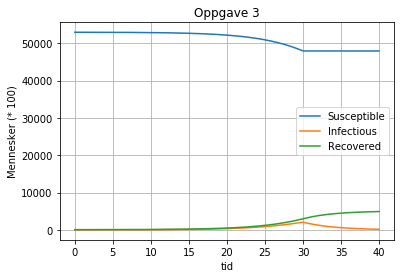

In [76]:
#3
import numpy as np
import matplotlib.pyplot as plt
import os
import math

#Lese fra fil(N,tid,b,f,S0,I0,R0)
#og returnerer listen av parametre over i float
#Input parameter er linjes nummer fra config fil. 
def initialValues(linjeTall):
   
    f = open("initsir.dat", "r") #åpner filen
    line = f.readline() #leser første linjen
    ln = 1
    #Finner og leser linjeTall
    while line:
        if(ln == linjeTall):
            break
        else:
            line = f.readline()
            ln += 1
    f.close()
    params = line.split('#')[0] #Leser alt før #

    res = params.split(",") #Konverterer string (params) til liste res 

    # Konverterer liste elementer til float
    newlist = [] #tom liste
    #Går gjennom hele lista og konverterer elementer til float  
    for i in range(0, len(res)):
        newlist.append(float(res[i]))

    return newlist

#Funksjon for regning av SIR modell
def SIR(b,f,S0, I0, R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

#initialisering av matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0

#Eulers metode
    for i in range(N-1):
        if t[i] > 30:
            b = 0.00000001
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]

        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt
    return t,S,I,R

def plot(title):
    # Plotter diagramet
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infectious')
    plt.plot(t,R,label='Recovered')
    plt.title(title)
    plt.xlabel('tid')
    plt.ylabel('Mennesker (* 100)')
    plt.legend()
    plt.grid()
    plt.show()

#Hoved


#Oppgave 3
#Definere konstanter 
iv = initialValues(3) #config parameter fra linje 3
N = int(iv[0]) #Antall mennesker
tid = int(iv[1]) #dager
dt = tid/(N-1)

t,S,I,R = SIR(iv[2], iv[3],iv[4],iv[5],iv[6])
plot('Oppgave 3')


#Vi brukte at Norge har 5.300.000 borgere. Smittede i Norge er nå 8197, med 92% av de friske. 
#For å få et finere graf, minket vi alle tall 100 ganger. 
#Det betyr at: N=53000, S0=N-I0-R0, I0=6.55, R0=75.41. 
#Vi gjorde en regresjonssanalyse for Norge i dag, det betyr at:
#Det største antall smittede per dag var i dag 30. Tiltak for behandling av smitting har blitt gjort 12.mars, 2 uker etter epidemien.
#Tiltakene som har blitt endret er som følger: 
#Reduksjon av offentlig transport, online skole og jobb,osv...
#Smittespredning har blitt redusert(b er mindre) som betyr at det blir mindre smittet per dag. 
#Til dag 30, er b = 0.0000085 og f = 0.25(25%). Men etter det b = 0.00000001
#Vi brukte også tid = 40 dager for å vise alt som kan skje i situasjonen. 
#På dag 30, er det mest smittede som er realistisk i følge vg/fhi modellen. 

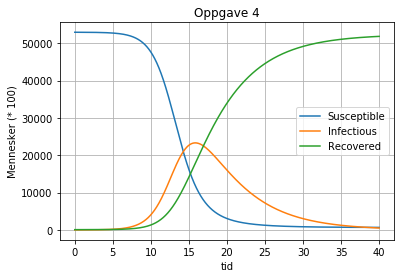

In [103]:
#4
import numpy as np
import matplotlib.pyplot as plt
import os
import math

#Lese fra fil(N,tid,b,f,S0,I0,R0)
#og returnerer listen av parametre over i float
#Input parameter er linjes nummer fra config fil. 
def initialValues(linjeTall):
   
    f = open("initsir.dat", "r") #åpner filen
    line = f.readline() #leser første linjen
    ln = 1
    #Finner og leser linjeTall
    while line:
        if(ln == linjeTall):
            break
        else:
            line = f.readline()
            ln += 1
    f.close()
    params = line.split('#')[0] #Leser alt før #

    res = params.split(",") #Konverterer string (params) til liste res 

    # Konverterer liste elementer til float
    newlist = [] #tom liste
    #Går gjennom hele lista og konverterer elementer til float  
    for i in range(0, len(res)):
        newlist.append(float(res[i]))

    return newlist

#Funksjon for regning av SIR modell
def SIR(b,f,S0, I0, R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

#initialisering av matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0

#Eulers metode
    for i in range(N-1):
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]

        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt
    return t,S,I,R

def plot(title):
    # Plotter diagramet
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infectious')
    plt.plot(t,R,label='Recovered')
    plt.title(title)
    plt.xlabel('tid')
    plt.ylabel('Mennesker (* 100)')
    plt.legend()
    plt.grid()
    plt.show()

#Hoved


#Oppgave 4
#Definere konstanter 
iv = initialValues(4) #config parameter fra linje 4
N = int(iv[0]) #Antall mennesker
tid = int(iv[1]) #dager
dt = tid/(N-1)

t,S,I,R = SIR(iv[2], iv[3],iv[4],iv[5],iv[6])
plot('Oppgave 4')


#Vi brukte at Norge har 5.300.000 borgere. Smittede i Norge er nå 8197, med 92% av de friske. 
#For å få et finere graf, minket vi alle tall 100 ganger. 
#Det betyr at: N=53000, S0=N-I0-R0, I0=6.55, R0=75.41. 
#Vi gjorde en regresjonssanalyse for Norge i dag, det betyr at:
#I følge modellen vår, vil 2.2 millioner nordmenn bli smittet på ca. dag 16. 
#Dette er ikke helt realistisk sammenliknet med i dag, siden smittespredning i dag holder på å forsvinne. 






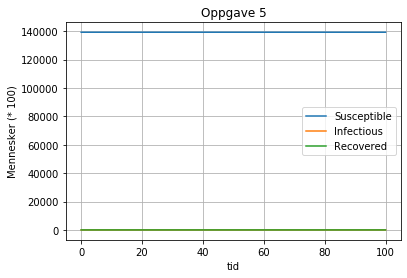

In [106]:
#5
import numpy as np
import matplotlib.pyplot as plt
import os
import math

#Lese fra fil(N,tid,b,f,S0,I0,R0)
#og returnerer listen av parametre over i float
#Input parameter er linjes nummer fra config fil. 
def initialValues(linjeTall):
   
    f = open("initsir.dat", "r") #åpner filen
    line = f.readline() #leser første linjen
    ln = 1
    #Finner og leser linjeTall
    while line:
        if(ln == linjeTall):
            break
        else:
            line = f.readline()
            ln += 1
    f.close()
    params = line.split('#')[0] #Leser alt før #

    res = params.split(",") #Konverterer string (params) til liste res 

    # Konverterer liste elementer til float
    newlist = [] #tom liste
    #Går gjennom hele lista og konverterer elementer til float  
    for i in range(0, len(res)):
        newlist.append(float(res[i]))

    return newlist

#Funksjon for regning av SIR modell
def SIR(b,f,S0, I0, R0):
    #matriser
    t = np.zeros(N)
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    Sder = np.zeros(N)
    Ider = np.zeros(N)
    Rder = np.zeros(N)

#initialisering av matrisene
    S[0] = S0
    R[0] = R0
    I[0] = I0

#Eulers metode
    for i in range(N-1):
        Sder[i] = -b*S[i] * I[i]
        Ider[i] = b*S[i] * I[i] - f*I[i]
        Rder[i] = f*I[i]

        S[i+1] = S[i]+Sder[i]*dt
        I[i+1] = I[i]+Ider[i]*dt
        R[i+1] = R[i]+Rder[i]*dt
        t[i+1] = t[i]+dt
    return t,S,I,R

def plot(title):
    # Plotter diagramet
    plt.plot(t,S,label='Susceptible')
    plt.plot(t,I,label='Infectious')
    plt.plot(t,R,label='Recovered')
    plt.title(title)
    plt.xlabel('tid')
    plt.ylabel('Mennesker (* 10000)')
    plt.legend()
    plt.grid()
    plt.show()

#Hoved


#Oppgave 5
#Definere konstanter 
iv = initialValues(5) #config parameter fra linje 5
N = int(iv[0]) #Antall mennesker
tid = int(iv[1]) #dager
dt = tid/(N-1)

t,S,I,R = SIR(iv[2], iv[3],iv[4],iv[5],iv[6])
plot('Oppgave 5')

#For at grafen skal se finere ut, minket vi alle tall 10000 ganger. 
#Kina har started med I0 = 1 og R0 = 0. Realistisk sett, har ca.80000 folk i kina blitt smittet. 
#Men 80000 smittet er ingenting sammeliknet med 1,4 milliarder. Så man kan ikke se at noe har blitt endret på grafen.
